<h1>Merge Sort</h1>

In [1]:
def mergeSort(alist):
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1

In [2]:
alist = [54,26,93,17,77,31,44,55,20]
mergeSort(alist)
print (alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


<h2>Correctitud</h2>
<b>Invariante:</b> La lista que se genera al final de cada invocación de la función debe ser igual a la lista original ordenada que inicia en la función

In [3]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

Algoritmo de quicksort incluyendo evaluación de la invariante

In [4]:
def right_merge_sort(alist):
    original_A=list(alist)
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        right_merge_sort(lefthalf)
        right_merge_sort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
        assert invariant(alist, original_A)
    
  

In [5]:
arr = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_merge_sort(arr)
print (arr)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [6]:
def wrong_merge_sort(alist):
    original_A=list(alist)
    try:
        if len(alist)>1:
            mid = len(alist)//2
            lefthalf = alist[:mid]
            righthalf = alist[mid:]

            wrong_merge_sort(lefthalf)
            wrong_merge_sort(righthalf)

            i=0
            j=0
            k=0
            while i < len(lefthalf) and j < len(righthalf):
                
                if lefthalf[i] > righthalf[j]:
                    alist[k]=lefthalf[i]
                    i=i+1
                else:
                    alist[k]=righthalf[j]
                    j=j+1
                k=k+1

            while i < len(lefthalf):
                alist[k]=lefthalf[i]
                i=i+1
                k=k+1

            while j < len(righthalf):
                alist[k]=righthalf[j]
                j=j+1
                k=k+1
            assert invariant(alist, original_A)
            
    except  AssertionError:
        print ("Error en el invariante de ciclo!")
        print ("j=", i)
        print ("i=", j)
        print ("A=", alist)
        print ("Original A=", original_A)


In [7]:
arr = [1,4,3]
wrong_merge_sort(arr)
print (arr)

Error en el invariante de ciclo!
j= 1
i= 1
A= [4, 3]
Original A= [4, 3]
Error en el invariante de ciclo!
j= 1
i= 2
A= [4, 3, 1]
Original A= [1, 4, 3]
[4, 3, 1]


<h2>Análisis del tiempo de ejecución</h2>

In [10]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print ("Number of steps =", self.steps)
        

def mergeSort_acct(alist,acct):
    if len(alist)>1:
        acct.count()   
        mid = len(alist)//2;acct.count()   
        lefthalf = alist[:mid];acct.count()   
        righthalf = alist[mid:];acct.count()   

        mergeSort_acct(lefthalf,acct);acct.count()   
        mergeSort_acct(righthalf,acct);acct.count()   

        i=0;acct.count()   
        j=0;acct.count()   
        k=0;acct.count()   
        acct.count()   
        while i < len(lefthalf) and j < len(righthalf):
            acct.count()   
            if lefthalf[i] < righthalf[j]:
                acct.count()   
                alist[k]=lefthalf[i];acct.count()   
                i=i+1;acct.count()   
            else:
                acct.count()   
                alist[k]=righthalf[j];acct.count()   
                j=j+1;acct.count()   
            k=k+1;acct.count()   
        acct.count()   
        while i < len(lefthalf):
            acct.count()   
            alist[k]=lefthalf[i];acct.count()   
            i=i+1;acct.count()   
            k=k+1;acct.count()   
        acct.count()   
        while j < len(righthalf):
            acct.count()   
            alist[k]=righthalf[j];acct.count()   
            j=j+1;acct.count()   
            k=k+1;acct.count()   
            

In [11]:
arr=[5,4,3,5,4,3,2]
acct = Counter()
mergeSort_acct(arr,acct)
acct.print_steps()

Number of steps = 165


<b>Análisis experimental</b><br>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función mergeSort_acct(arr,acct) y contabiliza el número de pasos.

In [12]:
import random

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = list(range(i))
        random.shuffle(l)
        acct.reset()
        mergeSort_acct(l,acct)
        results.append(acct.steps)
    return results

In [13]:
print (exper_analysis(10))

[0, 0, 21, 47, 73, 102, 134, 165, 195, 233]


Ahora vamos a analizar el tiempo del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función mergeSort_acct(arr,acct) y saca el tiempo que se demora el algoritmo.

In [16]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time
def timer_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = list(range(i))
        random.shuffle(l)
        acct.reset()
        tic = time.clock()
        mergeSort_acct(l,acct)
        toc = time.clock()
        results.append((toc-tic))
    return results

La siguiente gráfica representa el número de operaciones (azul), tiempo (rojo) y T(n) (negro) que el algoritmo de mergesort requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.

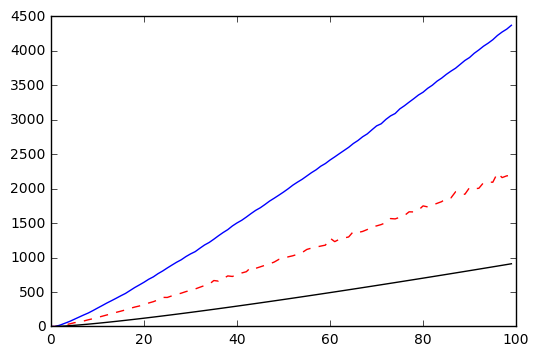

In [17]:
import pylab 
import math
import numpy as np
pylab.clf()
x = np.arange(100)
y = np.array(timer_analysis(100))*400000

a = np.arange(100)
b = np.array(exper_analysis(100))

c = np.arange(1,100)
d = c*(np.log(c))*2

pylab.plot(x, y, 'r--',a,b,'b-',c,d,'k-')
pylab.show()